In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split



In [2]:
data=pd.read_csv('Dataset/mergedData.csv')
data.head(20)

,text,label
0,truly wanted kill wasn seeking attention d t...,1
1,girlfriend killed week broke hello know start...,1
2,want die want kill wish stop existing,1
3,raped girlfriend feeling like giving know...,1
4,suicide permanent solution temporary problem ...,1
5,wish walk hospital throw arm organ want any...,1
6,starting feel like meant commit suicide way me...,1
7,seen child porn internet saw twitter multip...,1
8,actually suicidal d killed tell anybody fuck...,1
9,mom died hour ago thought id ready day reali...,1


In [3]:
data.describe()

,label
count,11338.000000
mean,0.525490
std,0.499372
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:

# Separate the text and label columns
X = data["text"].values
y = data["label"].values

# Tokenize the text
# data = pd.read_csv('data.csv')['text'].values.tolist()
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)

# print()
# Save the tokenizer as a CSV file
word_index = tokenizer.word_index
df = pd.DataFrame.from_dict(word_index, orient='index', columns=['index'])
# df.index.name = 'word'
df.to_csv('tokenizer.csv')

X = tokenizer.texts_to_sequences(X)

# Pad the sequences to have the same length
X = pad_sequences(X, maxlen=200)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(LSTM(128))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [7]:
# saving the model
# Save the model
# model.save('suicide_detection_model.h5')


In [25]:
#load the model
model = tf.keras.models.load_model('suicide_detection_model.h5')

# Make predictions on new data
# new_texts = ["I feel so alone", "I want to end my life"]
# new_texts= ["Today, I felt good in the morning; everything was good, but in the evening, it rained, and as a result, I got stuck in traffic. My life sucks; I should end it; I should kill myself."]
new_texts=['i am happy life']
new_texts = tokenizer.texts_to_sequences(new_texts)
new_texts = pad_sequences(new_texts, maxlen=200)
print(new_texts)
predictions = model.predict(new_texts)
print(predictions[0])
conf=0
# Print the predictions
# for i in range(len(new_texts)):
#     # print("Text:", new_texts[i])
#     print("Prediction:", predictions[i])
#     print(conf)
#     conf=max(conf,predictions[i])
# print(conf)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0 63  8]]
1/1 [==============================] - 1s 1s/step
[0.68657976]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the saved model
model = tf.keras.models.load_model('suicide_detection_model.h5')

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


71/71 [==============================] - 3s 41ms/step
Accuracy: 0.9704585537918872
Confusion matrix:
[[1003   46]
 [  21 1198]]


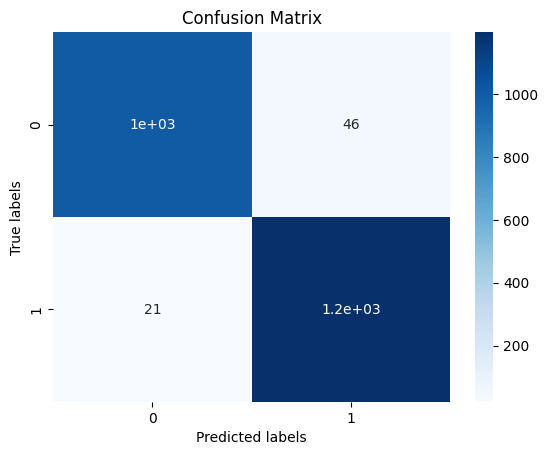

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(cm, annot=True, cmap="Blues")

# Set the axis labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()
